Nishant Mishra

21102B0045

 CMPN-B

Github link:-(https://github.com/Codeddeath03/ML-files)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score
from sklearn.metrics import accuracy_score
import plotly.express as px

In [2]:
df = pd.read_csv("data/housing.csv")

In [3]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df =df.dropna(axis=0, how='any')

In [11]:
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10687,-117.75,33.64,9.0,2499.0,492.0,1111.0,542.0,5.5342,182300.0,<1H OCEAN
5634,-118.28,33.74,40.0,1751.0,512.0,1939.0,503.0,1.5394,200000.0,NEAR OCEAN
7824,-118.13,33.91,36.0,1967.0,316.0,910.0,306.0,4.4948,190600.0,<1H OCEAN
15398,-117.15,33.20,16.0,2690.0,459.0,1253.0,393.0,4.0328,294600.0,<1H OCEAN
1642,-121.78,37.97,4.0,17032.0,2546.0,7653.0,2359.0,5.5601,213700.0,INLAND
14826,-117.09,32.66,38.0,833.0,206.0,570.0,182.0,1.8333,127100.0,NEAR OCEAN
384,-122.16,37.74,44.0,1097.0,239.0,609.0,215.0,2.0227,103100.0,NEAR BAY
15477,-117.18,33.16,15.0,5923.0,1206.0,3943.0,1006.0,3.1793,159900.0,<1H OCEAN
2397,-119.32,37.06,15.0,3111.0,651.0,276.0,107.0,5.1314,179200.0,INLAND
19715,-121.64,39.28,25.0,2857.0,662.0,2076.0,685.0,1.8095,64100.0,INLAND


In [12]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [14]:
unique_val = df['ocean_proximity'].unique()
unique_val

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [15]:
df['ocean_proximity'] = df['ocean_proximity'].map({'NEAR BAY': 1, '<1H OCEAN': 2, 'INLAND': 3, 'NEAR OCEAN' : 4, 'ISLAND': 5})

In [16]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,1
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,1
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,1
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,1
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,1


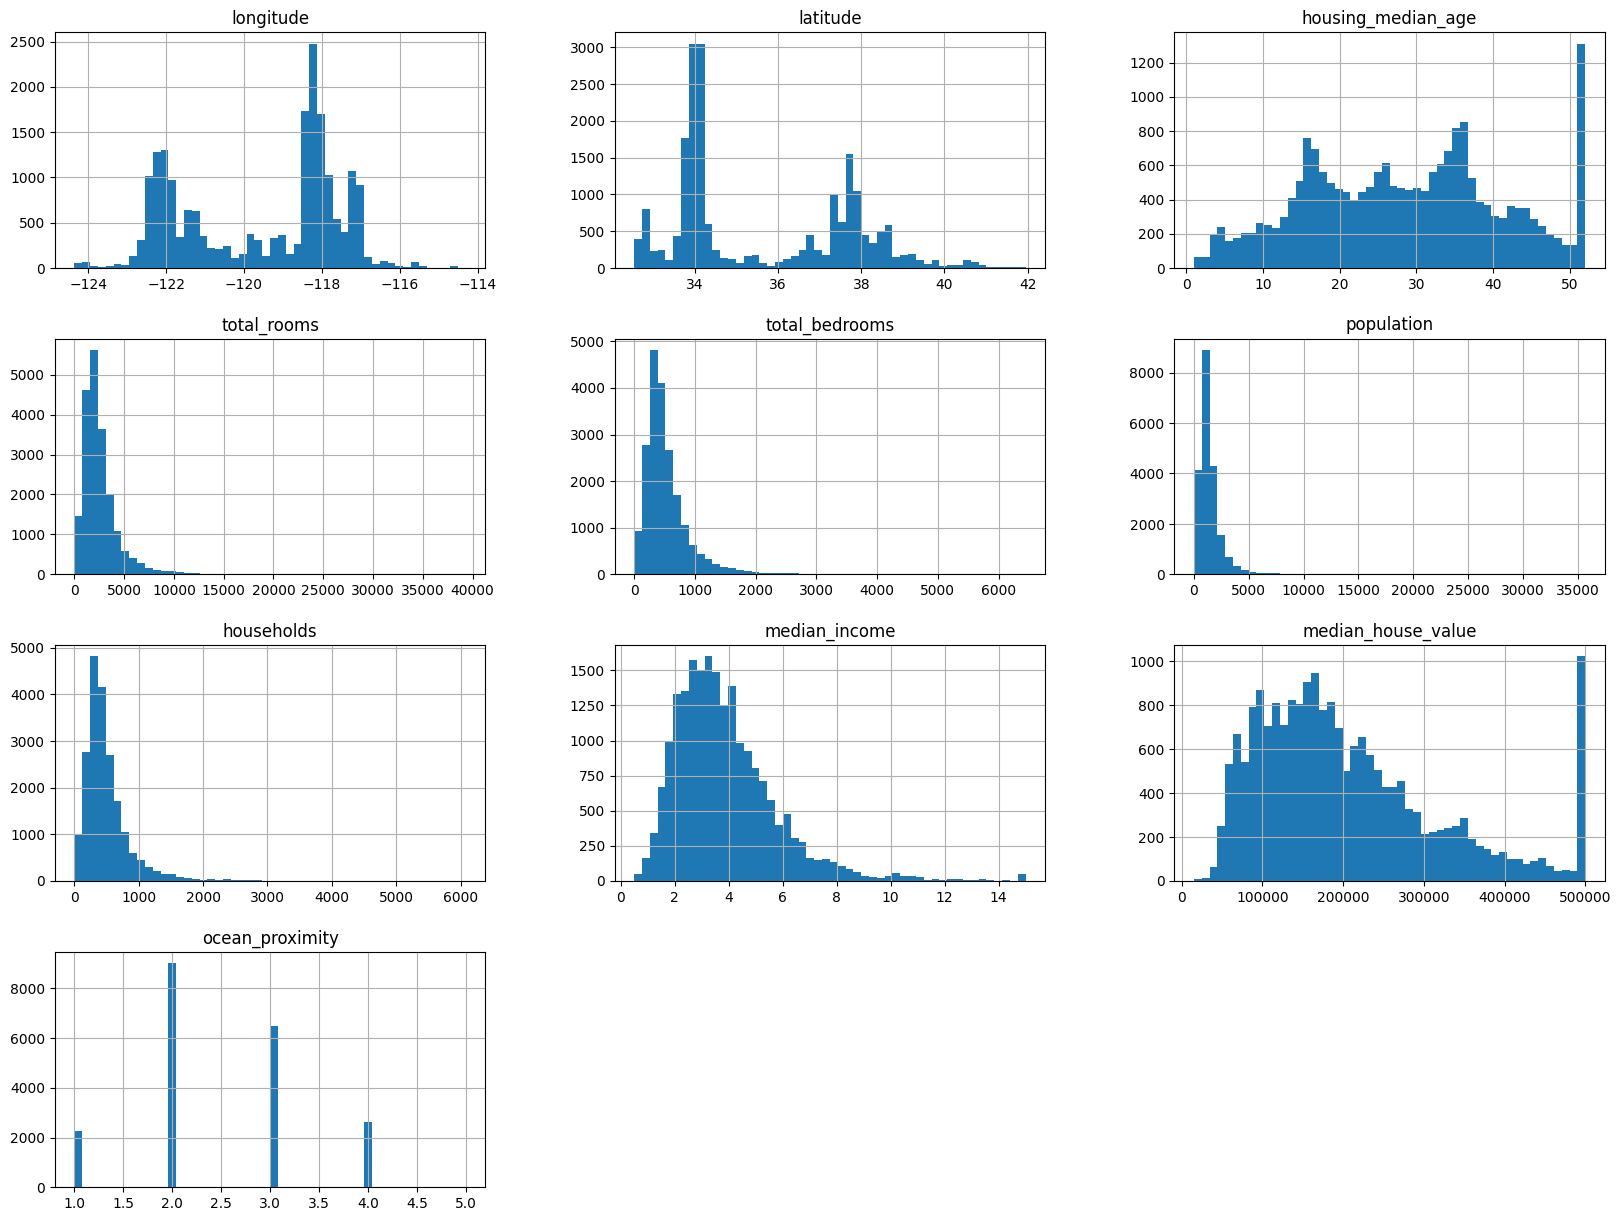

In [17]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [18]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.181198
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.067980
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.206178
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.015917
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.004081
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.007061
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.015561
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.129415
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,-0.212014
ocean_proximity,0.181198,-0.067980,-0.206178,0.015917,0.004081,-0.007061,-0.015561,-0.129415,-0.212014,1.000000


In [19]:
corrln = df.corr()['median_house_value']
round(corrln,2)

longitude            -0.05
latitude             -0.14
housing_median_age    0.11
total_rooms           0.13
total_bedrooms        0.05
population           -0.03
households            0.06
median_income         0.69
median_house_value    1.00
ocean_proximity      -0.21
Name: median_house_value, dtype: float64

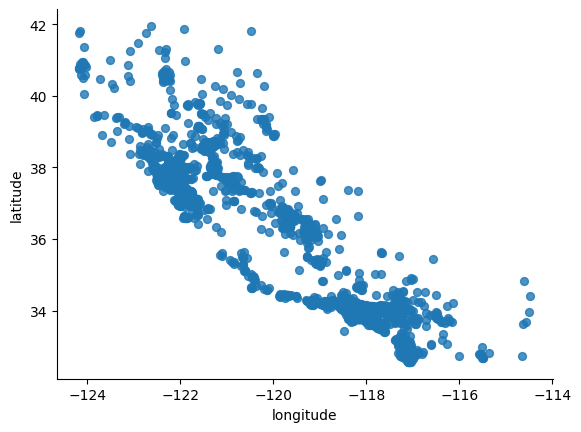

In [20]:
df.sample(3000).plot(kind='scatter', x='longitude', y='latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

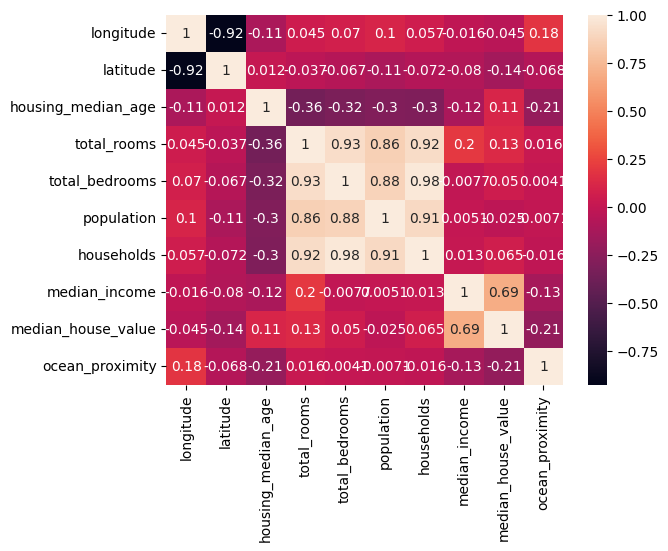

In [21]:
ax = sns.heatmap(df.corr(), annot = True)

In [22]:
data = df.head(2000)
px.scatter(data, x='median_income', y='median_house_value')

<Axes: xlabel='median_house_value', ylabel='Count'>

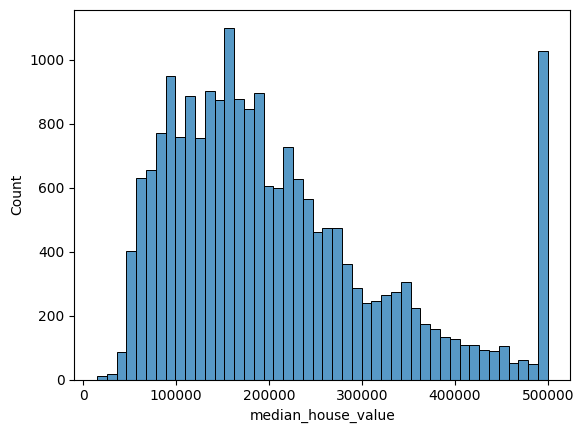

In [23]:
sns.histplot(df['median_house_value'])

In [24]:
df.columns
housing_df = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity',  'median_house_value']]

In [25]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,1,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,1,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,1,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,1,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,1,342200.0


In [26]:
train_pd, test_pd, val_pd = housing_df[:18000], housing_df[18000:19217], housing_df[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1218)

In [27]:
X_train, y_train = train_pd.drop('median_house_value', axis=1), train_pd.to_numpy()[:, -1]
X_train.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,1
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,1
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,1
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,1
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,1
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,1


In [28]:
X_val, y_val = val_pd.to_numpy()[:,:-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:,:-1], test_pd.to_numpy()[:, -1]

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((18000, 9), (18000,), (1217, 9), (1217,), (1218, 9), (1218,))

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

c:\Users\Homie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

c:\Users\Homie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [31]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8
0,-1.453822,1.204250,0.935040,-0.795703,-0.964371,-0.970876,-0.972988,2.329362,-1.682789
1,-1.448767,1.194570,-0.642170,2.018961,1.315597,0.843015,1.637958,2.316883,-1.682789
2,-1.458876,1.189729,1.802506,-0.530032,-0.822019,-0.819064,-0.841409,1.769472,-1.682789
3,-1.463931,1.189729,1.802506,-0.617382,-0.717005,-0.764970,-0.733049,0.923030,-1.682789
4,-1.463931,1.189729,1.802506,-0.457617,-0.611991,-0.758863,-0.629850,-0.019156,-1.682789
...,...,...,...,...,...,...,...,...,...
17995,-1.352724,0.947718,-0.799891,0.530841,1.597968,0.432076,1.676658,-0.192608,-0.513103
17996,-1.352724,0.957398,-1.036472,0.345732,1.518624,0.038586,1.392859,-0.155537,-0.513103
17997,-1.347669,0.952558,-0.642170,-0.075631,0.314465,0.044694,0.479544,0.011046,-0.513103
17998,-1.347669,0.952558,-0.326728,-0.255309,-0.362291,-0.141145,-0.309932,0.460457,-0.513103


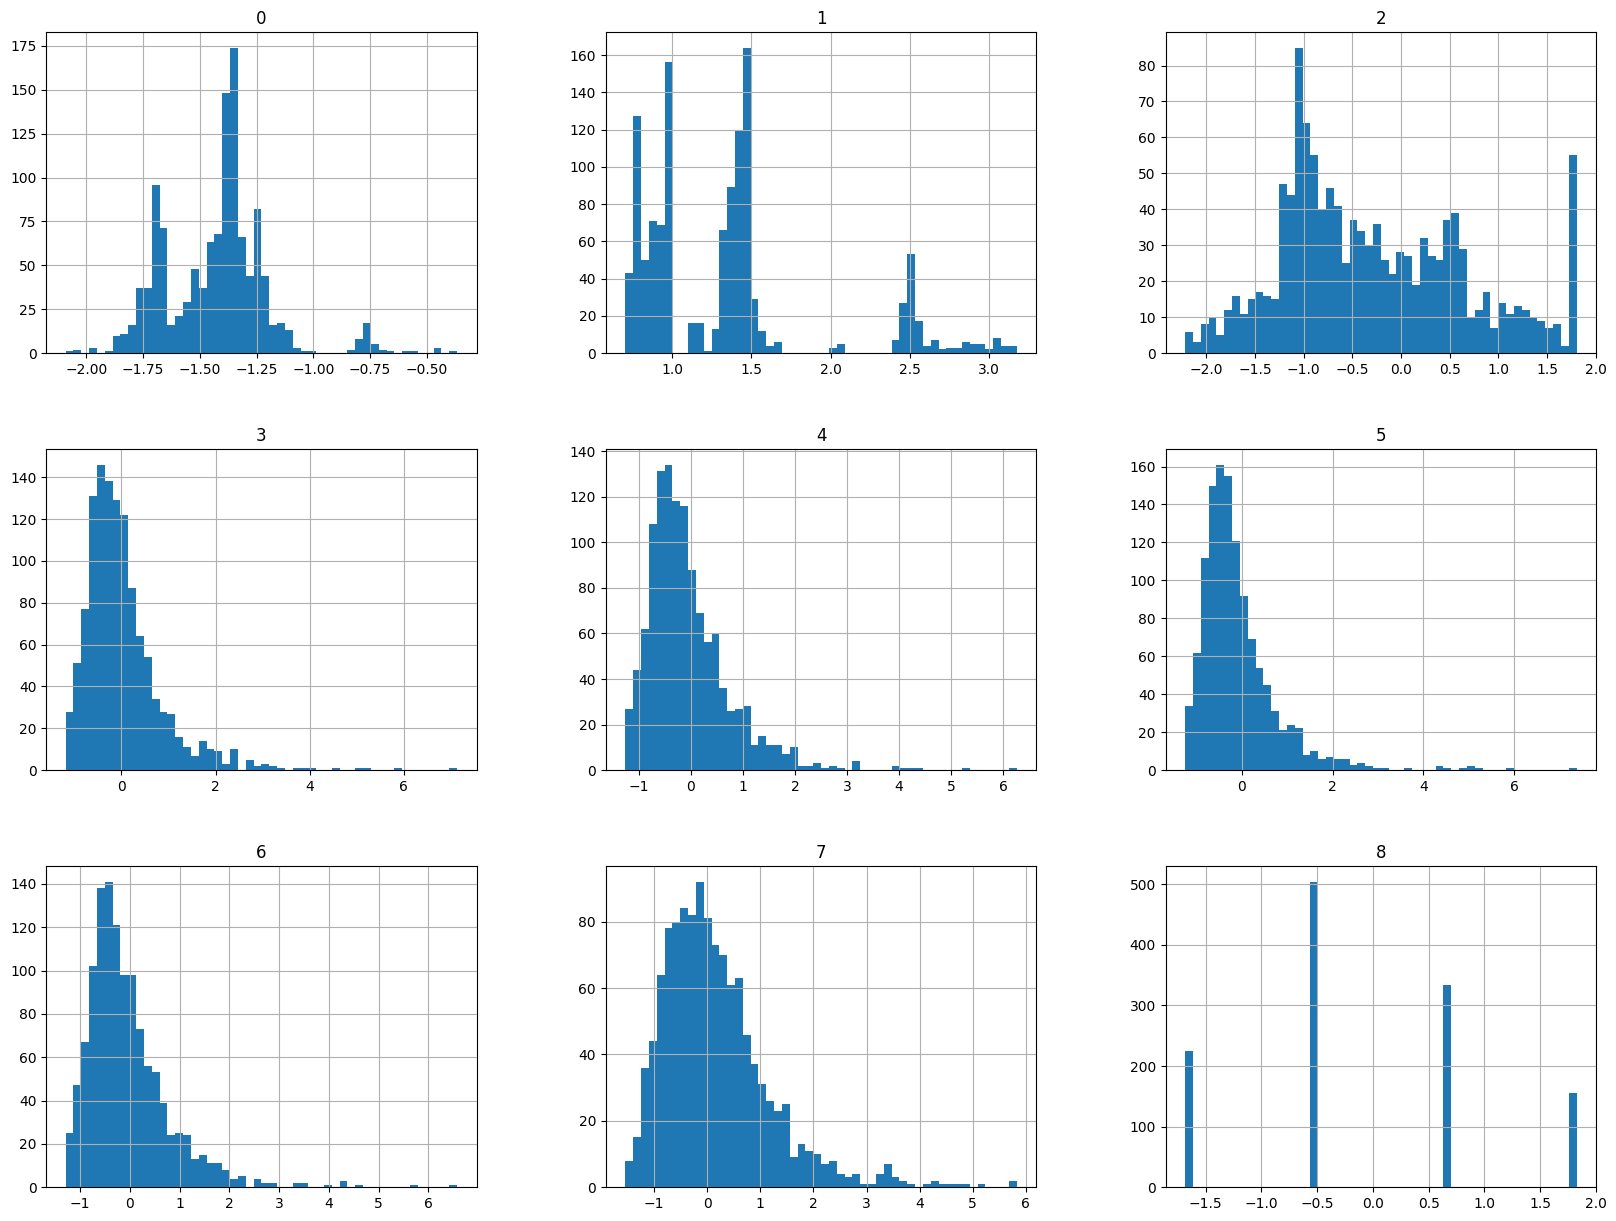

In [32]:
pd.DataFrame(X_test).hist(bins=50, figsize=(20,15))
plt.show()

In [33]:
X_train.shape, X_test.shape, X_val.shape,

((18000, 9), (1217, 9), (1218, 9))

In [34]:
# Preprocessing - scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train the model
lm = LinearRegression().fit(X_train_scaled, y_train)

In [35]:
y_train_pred = lm.predict(X_train_scaled)
y_val_pred = lm.predict(X_val_scaled)

In [36]:
mse_train = mse(y_train, y_train_pred)
rmse_train = mse(y_train, y_train_pred, squared=False)

# Calculate MSE and RMSE for validation set
mse_val = mse(y_val, y_val_pred)
rmse_val = mse(y_val, y_val_pred, squared=False)

# Calculate R² score for training set
r2_train = r2_score(y_train, y_train_pred)

# Calculate R² score for validation set
r2_val = r2_score(y_val, y_val_pred)

In [37]:
print(f'Training MSE: {mse_train}')
print(f'Training RMSE: {rmse_train}')
print(f'Training R²: {r2_train}')

Training MSE: 4985623211.241477
Training RMSE: 70608.94568849953
Training R²: 0.6267857733582585


In [38]:
print(f'Validation MSE: {mse_val}')
print(f'Validation RMSE: {rmse_val}')
print(f'Validation R²: {r2_val}')

Validation MSE: 3021634923.410531
Validation RMSE: 54969.39988221202
Validation R²: 0.6626316715336673


In [39]:
print('Predictions on the validation set:', y_val_pred[:5])

Predictions on the validation set: [104479.44966118 192574.74579031 146838.49904684 131771.43881713
 109040.18165488]


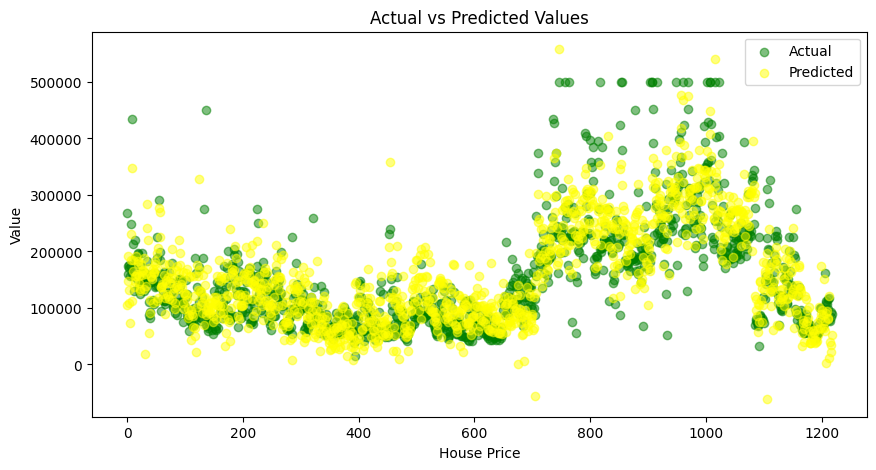

In [40]:
plt.figure(figsize=(10, 5))

# Plot actual values
plt.scatter(range(len(y_val)), y_val, color='Green', alpha=0.5, label='Actual')

# Plot predicted values
plt.scatter(range(len(y_val)), y_val_pred, color='yellow', alpha=0.5, label='Predicted')

plt.xlabel('House Price')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


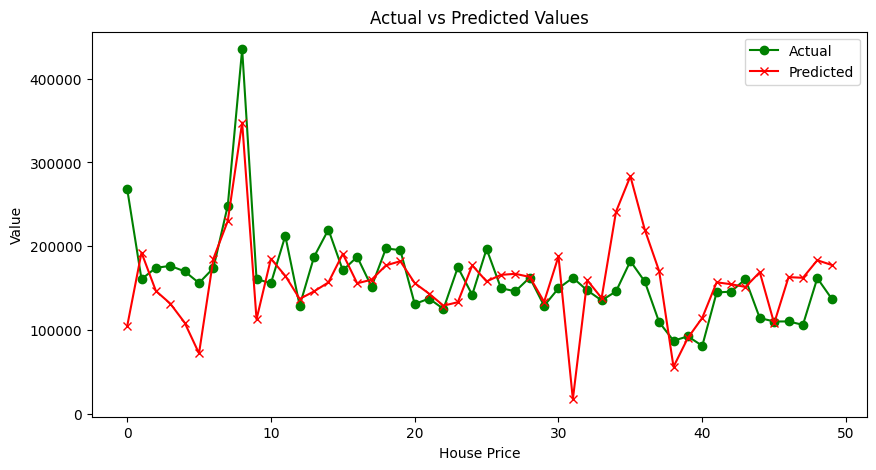

     Actual      Predicted
0  268800.0  104479.449661
1  160900.0  192574.745790
2  174400.0  146838.499047
3  176700.0  131771.438817
4  170200.0  109040.181655
5  156300.0   72394.068457
6  174100.0  185376.800261
7  248600.0  230228.194965
8  435000.0  347581.377987
9  161100.0  113045.716617


In [41]:

plt.figure(figsize=(10, 5))

plt.plot(y_val[:50], label='Actual', marker='o', color='green')
plt.plot(y_val_pred[:50], label='Predicted', marker='x', color='red')
plt.xlabel('House Price')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

comparison = pd.DataFrame({'Actual': y_val[:10], 'Predicted': y_val_pred[:10]})
print(comparison)

including libraries for ui

In [42]:
from jupyter_dash import JupyterDash 
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output, State

In [44]:
"""# Initialize the Dash app
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("House Price Prediction"),
    
    html.Div([
        html.Label('Longitude:'),
        dcc.Input(id='longitude', type='number', value=0),
    ]),
    
    html.Div([
        html.Label('Latitude:'),
        dcc.Input(id='latitude', type='number', value=0),
    ]),
    
    html.Div([
        html.Label('Housing Median Age:'),
        dcc.Input(id='housing_median_age', type='number', value=0),
    ]),
    
    html.Div([
        html.Label('Total Rooms:'),
        dcc.Input(id='total_rooms', type='number', value=0),
    ]),
    
    html.Div([
        html.Label('Total Bedrooms:'),
        dcc.Input(id='total_bedrooms', type='number', value=0),
    ]),
    
    html.Div([
        html.Label('Population:'),
        dcc.Input(id='population', type='number', value=0),
    ]),
    
    html.Div([
        html.Label('Households:'),
        dcc.Input(id='households', type='number', value=0),
    ]),
    
    html.Div([
        html.Label('Median Income:'),
        dcc.Input(id='median_income', type='number', value=0),
    ]),
    
    html.Div([
        html.Label('Ocean Proximity:'),
        dcc.Input(id='ocean_proximity', type='text', value=''),
    ]),
    
    html.Button('Predict', id='predict-button'),
    
    html.Div(id='prediction-output'),
    
    dcc.Graph(id='prediction-graph')
])

# Define the callback to update the prediction
@app.callback(
    [Output('prediction-output', 'children'),
     Output('prediction-graph', 'figure')],
    [Input('predict-button', 'n_clicks')],
    [State('longitude', 'value'),
     State('latitude', 'value'),
     State('housing_median_age', 'value'),
     State('total_rooms', 'value'),
     State('total_bedrooms', 'value'),
     State('population', 'value'),
     State('households', 'value'),
     State('median_income', 'value'),
     State('ocean_proximity', 'value')]
)
def update_prediction(n_clicks, longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity):
    if n_clicks is None:
        return '', {}
    
    # Convert ocean proximity to numerical value if needed
    ocean_proximity_dict = {'<1H OCEAN': 0, 'INLAND': 1, 'NEAR OCEAN': 2, 'NEAR BAY': 3, 'ISLAND': 4}
    ocean_proximity = ocean_proximity_dict.get(ocean_proximity.upper(), -1)
    
    features = np.array([[longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity]])
    prediction = lm.predict(features)[0]
    
    # Create a simple bar chart
    fig = px.bar(x=['Predicted Price'], y=[prediction], labels={'x': '', 'y': 'Price'})
    
    return f'Predicted House Price: ${prediction:.2f}', fig

# Run the app
app.run_server(mode='inline')"""

c:\Users\Homie\AppData\Local\Programs\Python\Python311\Lib\site-packages\dash\dash.py:556: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.

